# Data Scientist Coding Challenge

# Task 2. Implementing a Classifier

As a data science team in a credit card company, our goal is to develop risk models in order to measure the probability of a customer ceasing repayment of their balance. Your task is to build a classifier that predicts which customers will be unable to pay their balance for 2 months within the next 12 months.


For this task, we are mostly interested in observing your methodology. So, please focus on implementing the appropriate preprocessing steps while writing clean and documented code. Do not worry so much about applying cutting edge Machine Learning / Deep Learning models in order to achieve a great model performance score. Basic models such as Logistic Regression are always welcome.

You are given two datasets, “X.csv” and “y.csv”, containing the features and the labels respectively. Your task is to split the dataset into train and test sets and fit only 2 classification algorithms on the training set. You may choose any classification algorithms that you prefer. After fitting, evaluate the performance of the two models on the test set.

The file “X.csv” has the following columns:

## The file

- id: unique identifier of the account
- existing_score: the score of the existing machine learning model (you may use it as an input or for checking if your model performs better than the existing model)
- open_to_buy: the difference between the credit limit and the balance. If the customer does not have a credit card, it is NaN.
- months_since_first_loan_issued: number of months since the first loan was issued. If the customer has not taken any loans, it is NaN
- existing_credit_card_utilization: balance / credit limit * 100, e.g. 30 means that 30% of the credit limit is utilized. If the customer does not have a credit card already, it is NaN 
- n_months_mortgage_loan_paid: number of months during which the balance of the account decreased. If the customer does not have a mortgage already, it is NaN

## “y.csv” contains the following columns:

- id: unique identifier of the account
- label: 1 if the account did not pay their balance for 2 months during the next 12 months, otherwise 0.

# Output

For Task 1, you can attach a .txt file with your SQL queries. For Task 2, you can attach a .ipynb file (preferred) or a .py file (or a combination). If you choose to include only .py files, please include any visualizations as separate images.

Thank you for your time and good luck!

In [1]:
# Start by importing essential libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv data using pd.read_csv function, define the 'id' column as the index.
file_X = pd.read_csv('X.csv', index_col = 'id')
file_y = pd.read_csv('y.csv', index_col = 'id')

# Show the first 10 rows.
file_X.head(10)

existing_score  open_to_buy  months_since_first_loan_issued  \
id                                                                
0            287.0         68.0                            52.0   
1            457.0        603.0                             NaN   
2            227.0        757.0                             9.0   
3            658.0       8207.0                           155.0   
4            269.0        384.0                            58.0   
5            350.0       2570.0                            41.0   
6            439.0       9087.0                            67.0   
7            545.0       5156.0                            32.0   
8            364.0      10247.0                            25.0   
9            372.0        615.0                             7.0   

    existing_credit_card_utilization  n_months_mortgage_loan_paid  
id                                                                 
0                                NaN                         12.0  
1                                NaN                          6.0  
2                               54.0                          2.0  
3                               10.0                         11.0  
4                               98.0                         13.0  
5                               91.0                         12.0  
6                               63.0                         14.0  
7                               90.0                         11.0  
8                               43.0                         10.0  
9                               29.0                          0.0

In [3]:
file_y.head(10)

label
id       
0       0
1       0
2       0
3       0
4       1
5       0
6       0
7       0
8       0
9       0

In [4]:
# Merge features and labels on 'id'
df = pd.merge(file_X, file_y, on='id')

In [5]:
df.head(10)

existing_score  open_to_buy  months_since_first_loan_issued  \
id                                                                
0            287.0         68.0                            52.0   
1            457.0        603.0                             NaN   
2            227.0        757.0                             9.0   
3            658.0       8207.0                           155.0   
4            269.0        384.0                            58.0   
5            350.0       2570.0                            41.0   
6            439.0       9087.0                            67.0   
7            545.0       5156.0                            32.0   
8            364.0      10247.0                            25.0   
9            372.0        615.0                             7.0   

    existing_credit_card_utilization  n_months_mortgage_loan_paid  label  
id                                                                        
0                                NaN                         12.0      0  
1                                NaN                          6.0      0  
2                               54.0                          2.0      0  
3                               10.0                         11.0      0  
4                               98.0                         13.0      1  
5                               91.0                         12.0      0  
6                               63.0                         14.0      0  
7                               90.0                         11.0      0  
8                               43.0                         10.0      0  
9                               29.0                          0.0      0

In [6]:
df.describe()

existing_score    open_to_buy  months_since_first_loan_issued  \
count    10000.000000    8423.000000                     7909.000000   
mean       455.101200    6366.140449                       94.764066   
std        148.468503   10395.441692                       75.162791   
min         71.000000       0.000000                        0.000000   
25%        338.000000     645.000000                       38.000000   
50%        436.000000    2381.000000                       76.000000   
75%        572.000000    7569.000000                      135.000000   
max        801.000000  260373.000000                      553.000000   

       existing_credit_card_utilization  n_months_mortgage_loan_paid  \
count                       6574.000000                  9120.000000   
mean                          48.868117                     9.125877   
std                           36.674519                     3.936767   
min                            0.000000                     0.000000   
25%                           10.000000                     7.000000   
50%                           48.000000                    10.000000   
75%                           86.000000                    12.000000   
max                          134.000000                    14.000000   

             label  
count  10000.00000  
mean       0.03650  
std        0.18754  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max        1.00000

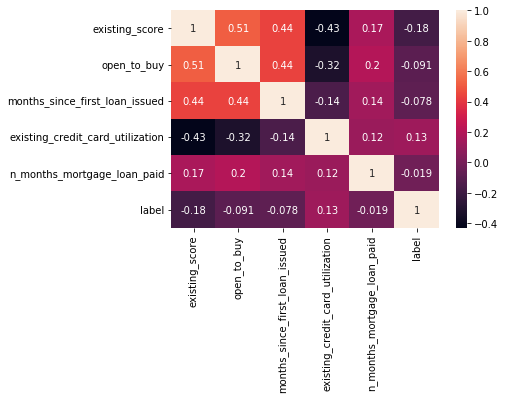

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Binomial Distribution

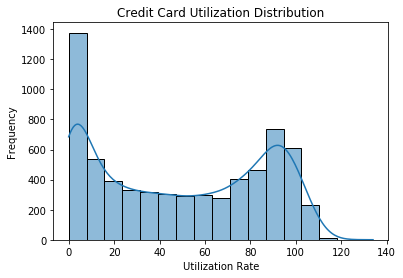

In [8]:
# Plot the distribution of the 'int_rate' column.
sns.histplot(data=df, x='existing_credit_card_utilization', kde=True)

# Set axis labels and title.
plt.xlabel('Utilization Rate')
plt.ylabel('Frequency')
plt.title('Credit Card Utilization Distribution')

# Display the plot.
plt.show()

In [9]:
# Using the pandas isna() function to search for missing values.
check = df.isna().sum()
check.sum()
# Display the total number of missing observations for each variable.
df.isna().sum()

existing_score                         0
open_to_buy                         1577
months_since_first_loan_issued      2091
existing_credit_card_utilization    3426
n_months_mortgage_loan_paid          880
label                                  0
dtype: int64

## Deciding how to handle missing values

Given the context of the problem, replacing NaN values with zero seems reasonable here.

- If a customer does not have a credit card values are represented as NaN. It's appropiate to replace NaN values in the open_to_buy and existing_credit_card_utilization columns as 0.

- Similarly if a customer has not taken out a loan or a mortgage NaN is used in the months_since_first_loan_issued and n_months_mortgage_loan_paid columns, it again makes sense to replace these values with 0's.

Before going forward let's make a copy of out joint data frame.

In [10]:
# Create a copy of joint dataframe.
df_clean = df
# Using the dropna() function to drop NaN observations.
df_clean = df_clean.fillna(0)
# Check to see if function worked as intended.
df_clean.isna().sum()

existing_score                      0
open_to_buy                         0
months_since_first_loan_issued      0
existing_credit_card_utilization    0
n_months_mortgage_loan_paid         0
label                               0
dtype: int64

In [11]:
df_clean.head(10)

existing_score  open_to_buy  months_since_first_loan_issued  \
id                                                                
0            287.0         68.0                            52.0   
1            457.0        603.0                             0.0   
2            227.0        757.0                             9.0   
3            658.0       8207.0                           155.0   
4            269.0        384.0                            58.0   
5            350.0       2570.0                            41.0   
6            439.0       9087.0                            67.0   
7            545.0       5156.0                            32.0   
8            364.0      10247.0                            25.0   
9            372.0        615.0                             7.0   

    existing_credit_card_utilization  n_months_mortgage_loan_paid  label  
id                                                                        
0                                0.0                         12.0      0  
1                                0.0                          6.0      0  
2                               54.0                          2.0      0  
3                               10.0                         11.0      0  
4                               98.0                         13.0      1  
5                               91.0                         12.0      0  
6                               63.0                         14.0      0  
7                               90.0                         11.0      0  
8                               43.0                         10.0      0  
9                               29.0                          0.0      0

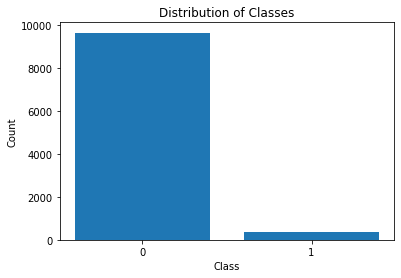

[9635  365]


In [12]:
# Count the number of instances of each class
class_counts = df_clean['label'].value_counts()

# Plot the counts
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks([0, 1])
plt.show()
print(class_counts.values)

In [13]:
minority_class_percentage = class_counts.min() / len(df_clean) * 100
print(f'Minority class accounts for {minority_class_percentage}% of the data')


Minority class accounts for 3.65% of the data


In [14]:
from sklearn.model_selection import train_test_split

y = df_clean['label']
X = df_clean.drop('label', axis=1)

# Split the data into 80:20 into trainig and testing sets.
# Use stratifying on the dependent variable to balance out the splitting accordingly.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Let's check that the splitting has worked as intended by
# checking the distribution of the binary target variable.

# Creating a general function to return the distribution of unique values.
def class_distribution(y):
    count = y.value_counts(normalize=True) * 100
    return count

# Calculate the class distribution in the original dataset, training set, and testing set
original_dist = class_distribution(y)
train_dist = class_distribution(y_train)
test_dist = class_distribution(y_test)

# Display the class distributions
print("Original dataset class distribution:\n", original_dist)
print("\n")
print("Training set class distribution:\n", train_dist)
print("\n")
print("Testing set class distribution:\n", test_dist)

Original dataset class distribution:
 0    96.35
1     3.65
Name: label, dtype: float64


Training set class distribution:
 0    96.35
1     3.65
Name: label, dtype: float64


Testing set class distribution:
 0    96.35
1     3.65
Name: label, dtype: float64


## Estimating a Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

# Training a logistic regression model withoug shrinking the parameters.
logit = LogisticRegression(max_iter=1e5, fit_intercept = False).fit(X_train, y_train)

In [17]:
# Generate the predicted probabilities for the logistic regression.
logit_probs = logit.predict_proba(X_test)[:, 1]
logit_probs

array([0.06799055, 0.00730882, 0.04612358, ..., 0.0456452 , 0.00100591,
       0.00146463])

In [18]:
# Use the logistic regression model to compute predictions on the test data.
yhat  = logit.predict(X_test)

# Confusion matrix.
from sklearn import metrics
print(metrics.confusion_matrix(y_test, yhat))

[[1927    0]
 [  73    0]]


## No skill predictor

In [19]:
# Generate a no skill prediction (majority class).
# This forecast will always predict 0, which is the majority class.
ns_probs = [0 for _ in range(len(y_test))]

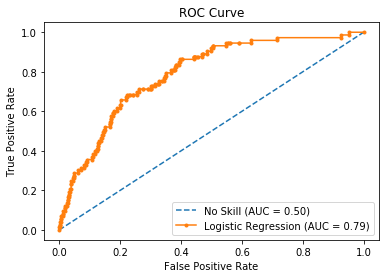

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score


# Calculate the ROC curve and ROC AUC scores for the no-skill prediction.
ns_auc = roc_auc_score(y_test, ns_probs)

# Same for logistic regression model.
logit_auc = roc_auc_score(y_test, logit_probs)

# Calculate the ROC curve coordinates.
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.title('ROC Curve')
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [22]:
print(y_train_resampled.value_counts())

1    7708
0    7708
Name: label, dtype: int64


In [23]:
# Training a logistic regression model withoug shrinking the parameters.
resampled_logit = LogisticRegression(max_iter=1e5, fit_intercept = False).fit(X_train_resampled, y_train_resampled)

In [24]:
# Generate the predicted probabilities for the logistic regression.
resampled_logit_probs = resampled_logit.predict_proba(X_test)[:, 1]
resampled_logit_probs

array([0.72264532, 0.20527199, 0.65480368, ..., 0.34329781, 0.08723658,
       0.01198913])

In [25]:
# Use the logistic regression model to compute predictions on the test data.
resampled_yhat  = resampled_logit.predict(X_test)

# Confusion matrix.
from sklearn import metrics
print(metrics.confusion_matrix(y_test, resampled_yhat))

[[1330  597]
 [  31   42]]


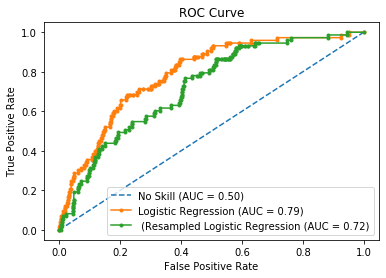

In [26]:
# Calculate the ROC AUC scores for the no-skill prediction, logistic regression, and classification tree
ns_auc = roc_auc_score(y_test, ns_probs)
logit_auc = roc_auc_score(y_test, logit_probs)
re_logit_auc = roc_auc_score(y_test, resampled_logit_probs)

# Calculate the ROC curve coordinates for plotting
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)

re_logit_fpr, re_logit_tpr, _ = roc_curve(y_test, resampled_logit_probs)


# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(re_logit_fpr, re_logit_tpr, marker='.', label=f' (Resampled Logistic Regression (AUC = {re_logit_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.title('ROC Curve')
plt.show()

In [27]:
import statsmodels.api as sm

# add constant if fit_intercept is True
X_train_resampled_sm = sm.add_constant(X_train_resampled) 

# Fit logistic regression model
logit_model=sm.Logit(y_train_resampled,X_train_resampled_sm)
result=logit_model.fit()

# print model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.529054
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                15416
Model:                          Logit   Df Residuals:                    15410
Method:                           MLE   Df Model:                            5
Date:                Fri, 14 Jul 2023   Pseudo R-squ.:                  0.2367
Time:                        12:24:30   Log-Likelihood:                -8155.9
converged:                       True   LL-Null:                       -10686.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                2.8721      0.078     36.77

In [27]:
# Define the class weights
weights = {0: 1, 1: 20}

# Training a logistic regression model with class weights and without shrinking the parameters.
weighted_logit = LogisticRegression(max_iter=1e5, fit_intercept = False, class_weight=weights).fit(X_train_resampled, y_train_resampled)

In [28]:
# Generate the predicted probabilities from the decision tree.
weighted_logit_probs = weighted_logit.predict_proba(X_test)[:, 1]
weighted_logit_probs

array([0.99029982, 0.92155787, 0.98838793, ..., 0.8687112 , 0.92770014,
       0.16118061])

In [29]:
# Use the logistic regression model to compute predictions on the test data.
w_resampled_yhat  = weighted_logit.predict(X_test)

# Confusion matrix.
from sklearn import metrics
print(metrics.confusion_matrix(y_test, w_resampled_yhat))

[[ 205 1722]
 [   1   72]]


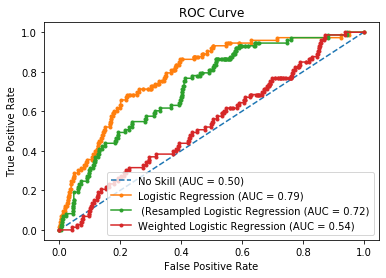

In [30]:
# Calculate the ROC AUC scores for the no-skill prediction, logistic regression, and classification tree
ns_auc = roc_auc_score(y_test, ns_probs)
logit_auc = roc_auc_score(y_test, logit_probs)
re_logit_auc = roc_auc_score(y_test, resampled_logit_probs)
we_logit_auc = roc_auc_score(y_test, weighted_logit_probs)

# Calculate the ROC curve coordinates for plotting
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
re_logit_fpr, re_logit_tpr, _ = roc_curve(y_test, resampled_logit_probs)
we_logit_fpr, we_logit_tpr, _ = roc_curve(y_test, weighted_logit_probs)

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(re_logit_fpr, re_logit_tpr, marker='.', label=f' (Resampled Logistic Regression (AUC = {re_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'Weighted Logistic Regression (AUC = {we_logit_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.title('ROC Curve')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the model
cv_logit = LogisticRegression(max_iter=1e5, fit_intercept = False)

# Define the parameter grid
cv_weights = np.linspace(0.05, 0.95, 20)
param_grid = {'class_weight': [{0: x, 1: 1.0-x} for x in cv_weights]}

# Define the grid search object
gridsearch = GridSearchCV(estimator=cv_logit, 
                          param_grid=param_grid, 
                          cv=5, 
                          scoring='recall',  # or 'roc_auc', or other appropriate metric
                          n_jobs=-1)

# Fit the grid search object to the data
gridsearch.fit(X_train, y_train)

# Extract the best estimator
best_logit = gridsearch.best_estimator_

# Fit the best estimator to the data
best_logit.fit(X_train_resampled, y_train_resampled)

# Generate the predicted probabilities for the logistic regression
cv_logit_probs = best_logit.predict_proba(X_test)[:, 1]

# Use the logistic regression model to compute predictions on the test data
cv_yhat = best_logit.predict(X_test)

# Print the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, cv_yhat))


[[ 210 1717]
 [   1   72]]


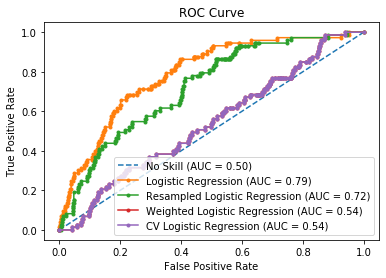

In [32]:
# Calculate the ROC AUC scores for the no-skill prediction, logistic regression, and classification tree
ns_auc = roc_auc_score(y_test, ns_probs)
logit_auc = roc_auc_score(y_test, logit_probs)
re_logit_auc = roc_auc_score(y_test, resampled_logit_probs)
we_logit_auc = roc_auc_score(y_test, weighted_logit_probs)
cv_logit_auc = roc_auc_score(y_test, cv_logit_probs)

# Calculate the ROC curve coordinates for plotting
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
re_logit_fpr, re_logit_tpr, _ = roc_curve(y_test, resampled_logit_probs)
we_logit_fpr, we_logit_tpr, _ = roc_curve(y_test, weighted_logit_probs)
cv_logit_fpr, cv_logit_tpr, _ = roc_curve(y_test, cv_logit_probs)

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(re_logit_fpr, re_logit_tpr, marker='.', label=f'Resampled Logistic Regression (AUC = {re_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'Weighted Logistic Regression (AUC = {we_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'CV Logistic Regression (AUC = {cv_logit_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.title('ROC Curve')
plt.show()

In [33]:
from imblearn.under_sampling import RandomUnderSampler

# define the undersampling method
undersample = RandomUnderSampler(sampling_strategy='majority')

# apply the transform to the training dataset
X_train_undersampled, y_train_undersampled = undersample.fit_resample(X_train, y_train)

print(y_train_undersampled.value_counts())

1    292
0    292
Name: label, dtype: int64


In [34]:
# Training a logistic regression model on undersampled data.
undersampled_logit = LogisticRegression(max_iter=1e5, fit_intercept = False).fit(X_train_undersampled, y_train_undersampled)

In [35]:
# Generate the predicted probabilities for the undersampled logistic regression.
undersampled_logit_probs = undersampled_logit.predict_proba(X_test)[:, 1]
undersampled_logit_probs

array([0.7992885 , 0.16193521, 0.75562273, ..., 0.37352343, 0.11818678,
       0.00390068])

In [36]:
# Use the logistic regression model to compute predictions on the test data.
undersampled_yhat  = undersampled_logit.predict(X_test)

# Confusion matrix.
from sklearn import metrics
print(metrics.confusion_matrix(y_test, undersampled_yhat))

[[1210  717]
 [  23   50]]


## Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions
rf_yhat = rf.predict(X_test)

from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, rf_yhat))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1927
           1       0.00      0.00      0.00        73

    accuracy                           0.96      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.96      0.94      2000



In [38]:
# Confusion matrix for random forest model.
print(metrics.confusion_matrix(y_test, rf_yhat))

[[1921    6]
 [  73    0]]


In [39]:
# Generate the predicted probabilities from the Random Forest model.
rf_probs = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC scores for the cross-validated decision tree.
rf_auc = roc_auc_score(y_test, rf_probs)

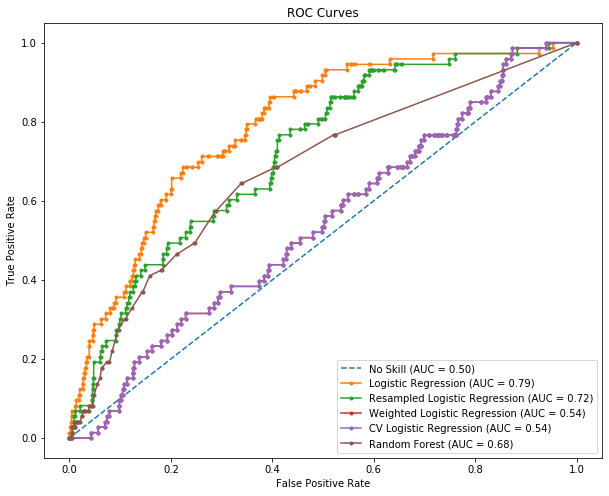

In [40]:
# Calculate the ROC AUC scores for the no-skill prediction, logistic regression, and classification tree
ns_auc = roc_auc_score(y_test, ns_probs)
logit_auc = roc_auc_score(y_test, logit_probs)
re_logit_auc = roc_auc_score(y_test, resampled_logit_probs)
we_logit_auc = roc_auc_score(y_test, weighted_logit_probs)
cv_logit_auc = roc_auc_score(y_test, cv_logit_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
# Display the plot.

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(re_logit_fpr, re_logit_tpr, marker='.', label=f'Resampled Logistic Regression (AUC = {re_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'Weighted Logistic Regression (AUC = {we_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'CV Logistic Regression (AUC = {cv_logit_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, marker='.', label=f'Random Forest (AUC = {rf_auc:.2f})')

# Set axis labels,legend and title.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curves')


plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15],
    'class_weight': ['balanced', 'balanced_subsample'] 
}

# Create a base model
cv_rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Use the best estimator directly
best_grid = grid_search.best_estimator_

# Fit the model and make predictions as you did before
best_grid.fit(X_train, y_train)
cv_rf_yhat = best_grid.predict(X_test)


Fitting 3 folds for each of 160 candidates, totalling 480 fits
{'class_weight': 'balanced', 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [42]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, cv_rf_yhat))

              precision    recall  f1-score   support

           0       0.99      0.61      0.76      1927
           1       0.07      0.82      0.14        73

    accuracy                           0.62      2000
   macro avg       0.53      0.72      0.45      2000
weighted avg       0.96      0.62      0.73      2000



In [43]:
# Confusion matrix for random forest model.
print(metrics.confusion_matrix(y_test, cv_rf_yhat))

[[1183  744]
 [  13   60]]


In [44]:
# Generate the predicted probabilities from the Random Forest model.
cv_rf_probs = best_grid.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC scores for the cross-validated decision tree.
cv_rf_auc = roc_auc_score(y_test, cv_rf_probs)

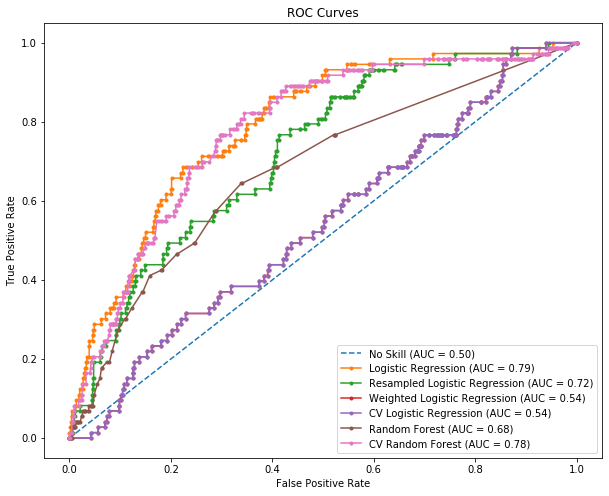

In [45]:
# Calculate the ROC AUC scores for the no-skill prediction, logistic regression, and classification tree
ns_auc = roc_auc_score(y_test, ns_probs)
logit_auc = roc_auc_score(y_test, logit_probs)
re_logit_auc = roc_auc_score(y_test, resampled_logit_probs)
we_logit_auc = roc_auc_score(y_test, weighted_logit_probs)
cv_logit_auc = roc_auc_score(y_test, cv_logit_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
cv_rf_fpr, cv_rf_tpr, _ = roc_curve(y_test, cv_rf_probs)

plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
# Display the plot.

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(re_logit_fpr, re_logit_tpr, marker='.', label=f'Resampled Logistic Regression (AUC = {re_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'Weighted Logistic Regression (AUC = {we_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'CV Logistic Regression (AUC = {cv_logit_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, marker='.', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(cv_rf_fpr, cv_rf_tpr, marker='.', label=f'CV Random Forest (AUC = {cv_rf_auc:.2f})')

# Set axis labels,legend and title.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curves')


plt.show()

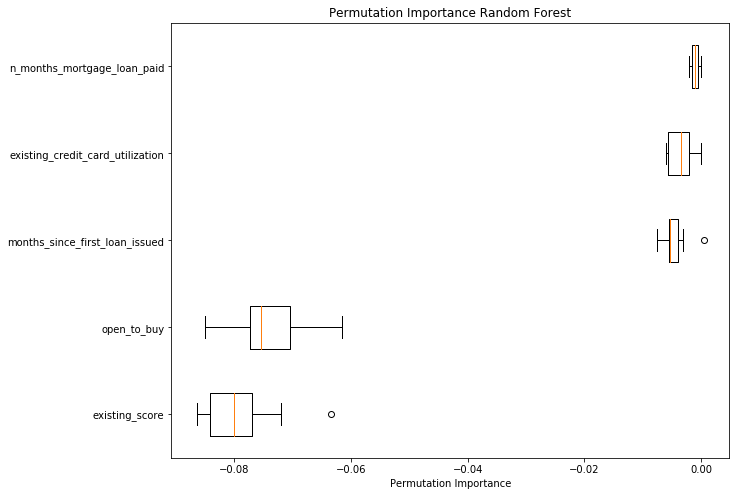

In [71]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute the permutation importances for the Random Forest classifier.
result = permutation_importance(best_grid, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance scores and their indices sorted by importance.
sorted_idx = result.importances_mean.argsort()

# Plot the feature importances as a boxplot.
plt.figure(figsize=(10, 8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance Random Forest')
plt.show()

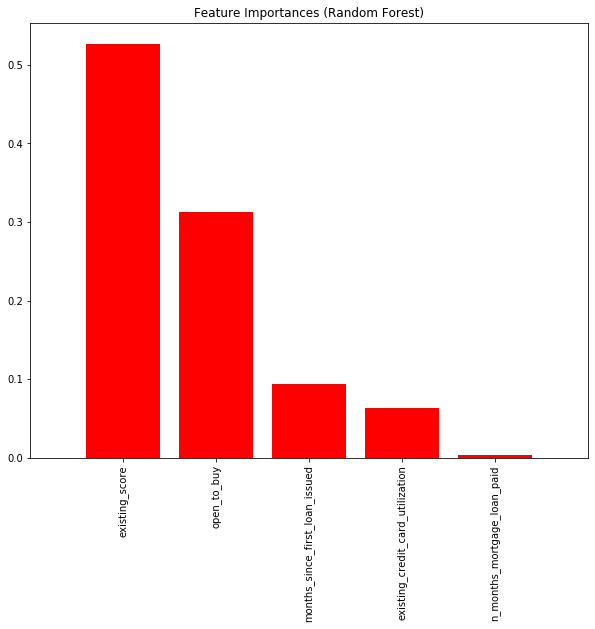

In [72]:
importances = best_grid.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [74]:
count_class_0, count_class_1 = y_train.value_counts()
weight = count_class_0 / count_class_1

In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=weight, use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_yhat = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, xgb_yhat))

# Print the confusion matrix
print(confusion_matrix(y_test, xgb_yhat))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1927
           1       0.08      0.11      0.09        73

    accuracy                           0.92      2000
   macro avg       0.52      0.53      0.52      2000
weighted avg       0.93      0.92      0.93      2000

[[1831   96]
 [  65    8]]


In [76]:
# Generate the predicted probabilities from the Random Forest model.
xgb_model_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC scores for the cross-validated decision tree.
xgb_model_auc = roc_auc_score(y_test, xgb_model_probs)

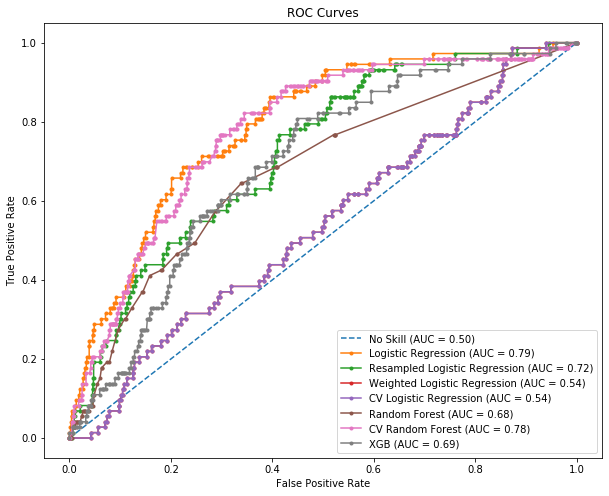

In [78]:
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_model_probs)

plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
# Display the plot.

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(re_logit_fpr, re_logit_tpr, marker='.', label=f'Resampled Logistic Regression (AUC = {re_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'Weighted Logistic Regression (AUC = {we_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'CV Logistic Regression (AUC = {cv_logit_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, marker='.', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(cv_rf_fpr, cv_rf_tpr, marker='.', label=f'CV Random Forest (AUC = {cv_rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label=f'XGB (AUC = {xgb_model_auc:.2f})')

# Set axis labels,legend and title.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curves')


plt.show()

In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize XGBoost model
r_xgb_model = XGBClassifier(scale_pos_weight=weight, use_label_encoder=False, eval_metric='logloss')

# Fit the model
r_xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
rxgb_yhat = r_xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, rxgb_yhat))

# Print the confusion matrix
print(confusion_matrix(y_test, rxgb_yhat))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1927
           1       0.07      0.29      0.11        73

    accuracy                           0.83      2000
   macro avg       0.52      0.57      0.51      2000
weighted avg       0.94      0.83      0.88      2000

[[1639  288]
 [  52   21]]


In [81]:
# Generate the predicted probabilities from the Random Forest model.
r_xgb_model_probs = r_xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC scores for the cross-validated decision tree.
r_xgb_model_auc = roc_auc_score(y_test, r_xgb_model_probs)

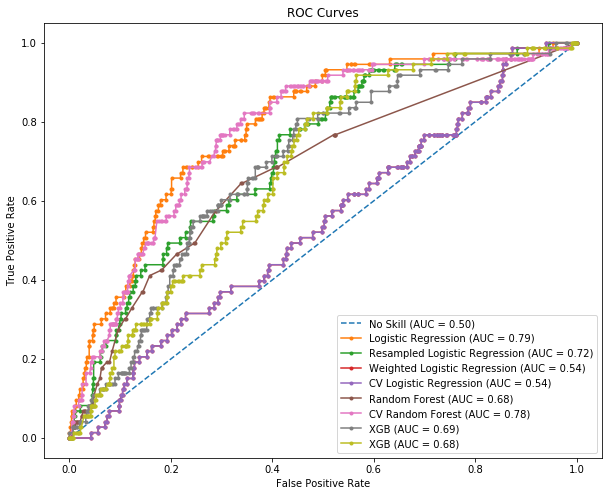

In [82]:
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_model_probs)
rxgb_fpr, rxgb_tpr, _ = roc_curve(y_test, r_xgb_model_probs)

plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
# Display the plot.

# Plot the ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=f'No Skill (AUC = {ns_auc:.2f})')
plt.plot(logit_fpr, logit_tpr, marker='.', label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(re_logit_fpr, re_logit_tpr, marker='.', label=f'Resampled Logistic Regression (AUC = {re_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'Weighted Logistic Regression (AUC = {we_logit_auc:.2f})')
plt.plot(we_logit_fpr, we_logit_tpr, marker='.', label=f'CV Logistic Regression (AUC = {cv_logit_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, marker='.', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(cv_rf_fpr, cv_rf_tpr, marker='.', label=f'CV Random Forest (AUC = {cv_rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label=f'XGB (AUC = {xgb_model_auc:.2f})')
plt.plot(rxgb_fpr, rxgb_tpr, marker='.', label=f'XGB (AUC = {r_xgb_model_auc:.2f})')

# Set axis labels,legend and title.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curves')


plt.show()

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'n_estimators': randint(50, 300),
}

# Initialize XGBoost model
rcv_xgb_model = XGBClassifier(scale_pos_weight=weight, use_label_encoder=False, eval_metric='logloss')

# Initialize the RandomizedSearchCV object
randomsearch = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
randomsearch.fit(X_train_resampled, y_train_resampled)

# Extract the best estimator
best_xgb = randomsearch.best_estimator_

# Fit the best estimator to the data
best_xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
best_xgb_yhat = best_xgb.predict(X_test)

# Print the classification report
print(classification_report(y_test, best_xgb_yhat))

# Print the confusion matrix
print(confusion_matrix(y_test, best_xgb_yhat))

# Print the AUC score
print('AUC: ', roc_auc_score(y_test, best_xgb_yhat))


              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1927
           1       0.07      0.15      0.09        73

    accuracy                           0.89      2000
   macro avg       0.52      0.54      0.52      2000
weighted avg       0.93      0.89      0.91      2000

[[1776  151]
 [  62   11]]
AUC:  0.5361623931016343


In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter grid to search over
xgb_param_grid = {
    'learning_rate': uniform(0.01, 0.6),  # uniform distribution between 0.01 and 0.6
    'n_estimators': range(100, 1000, 100),
    'max_depth': range(3, 10),
    'subsample': uniform(0.6, 0.4),  # uniform distribution between 0.6 and 1
    'colsample_bytree': uniform(0.6, 0.4),  # uniform distribution between 0.6 and 1
    'gamma': uniform(0, 0.5),  # uniform distribution between 0 and 0.5
    'min_child_weight': range(1, 6),
    'reg_alpha': uniform(0, 1),  # uniform distribution between 0 and 1
    'reg_lambda': uniform(1, 1)  # uniform distribution between 1 and 2
}

# Initialize XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=weight, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=50,  # number of parameter settings sampled
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV to the data
xgb_random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print(xgb_random_search.best_params_)

# Predict on the test set
xgb_yhat = xgb_random_search.best_estimator_.predict(X_test)

# Print the classification report
print(classification_report(y_test, xgb_yhat))

# Print the confusion matrix
print(confusion_matrix(y_test, xgb_yhat))

# Print the AUC score
print('AUC: ', roc_auc_score(y_test, xgb_yhat))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'colsample_bytree': 0.7710164073434198, 'gamma': 0.012709563372047594, 'learning_rate': 0.07473485619598266, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 400, 'reg_alpha': 0.5632755719763837, 'reg_lambda': 1.6955160864261276, 'subsample': 0.6557325817623503}
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1927
           1       0.07      0.22      0.10        73

    accuracy                           0.86      2000
   macro avg       0.52      0.55      0.51      2000
weighted avg       0.93      0.86      0.89      2000

[[1699  228]
 [  57   16]]
AUC:  0.5504297260984852


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15],
    'class_weight': ['balanced', 'balanced_subsample'] 
}

# Create a base model
r_rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Use the best estimator directly
best_grid = grid_search.best_estimator_

# Fit the model and make predictions as you did before
best_grid.fit(X_train, y_train)
rcv_rf_yhat = best_grid.predict(X_test)


# Print the classification report
print(classification_report(y_test, rcv_rf_yhat))

# Print the confusion matrix
print(confusion_matrix(y_test, rcv_rf_yhat))

# Print the AUC score
print('AUC: ', roc_auc_score(y_test, rcv_rf_yhat))

Fitting 3 folds for each of 160 candidates, totalling 480 fits
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1927
           1       0.09      0.26      0.13        73

    accuracy                           0.87      2000
   macro avg       0.53      0.58      0.53      2000
weighted avg       0.94      0.87      0.90      2000

[[1728  199]
 [  54   19]]
AUC:  0.5785023210185468
